In [52]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pyodbc
import pandas as pd

def run_query(query):
   
    conn = pyodbc.connect('''
        DRIVER={ODBC Driver 17 for SQL Server};
        SERVER=DESKTOP-TGFUTB3\\SQLEXPRESS;
        DATABASE=AdventureWorks2014;
        Trusted_Connection=yes;
        TrustServerCertificate=yes;
    ''')
    
    try:
        
        df = pd.read_sql(query, conn)
        return df
    except Exception as e:
        print("❌ حدث خطأ أثناء تنفيذ الاستعلام:", e)
    finally:
        conn.close()


C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


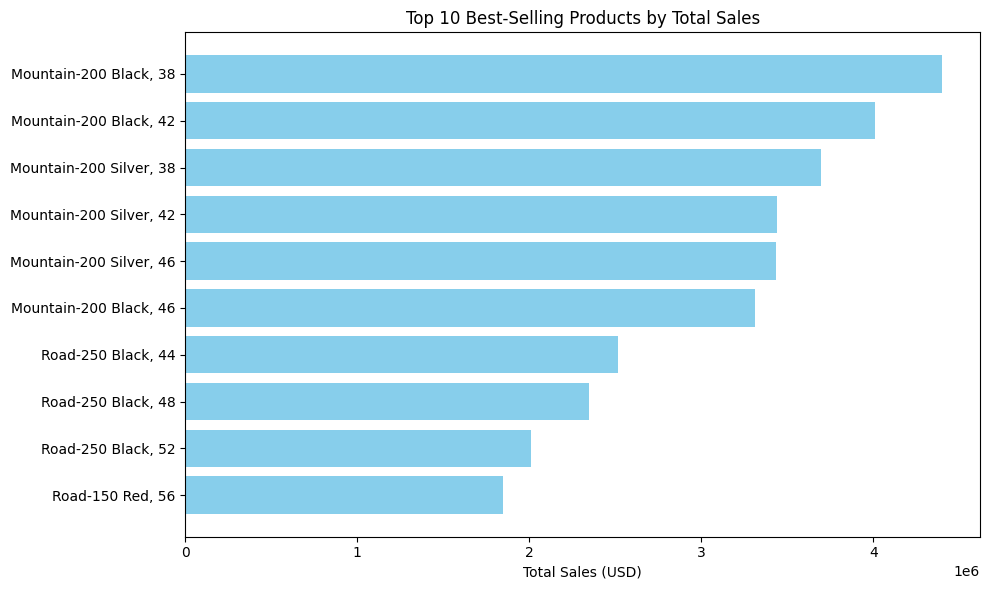

In [53]:
query1 = """SELECT TOP 10 p.Name, SUM(s.LineTotal) AS TotalSales
FROM Sales.SalesOrderDetail s
JOIN Production.Product p ON s.ProductID = p.ProductID
GROUP BY p.Name
ORDER BY TotalSales DESC"""
run_query(query1)

df = run_query(query1)


plt.figure(figsize=(10, 6))
plt.barh(df['Name'], df['TotalSales'], color='skyblue')
plt.xlabel('Total Sales (USD)')
plt.title('Top 10 Best-Selling Products by Total Sales')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


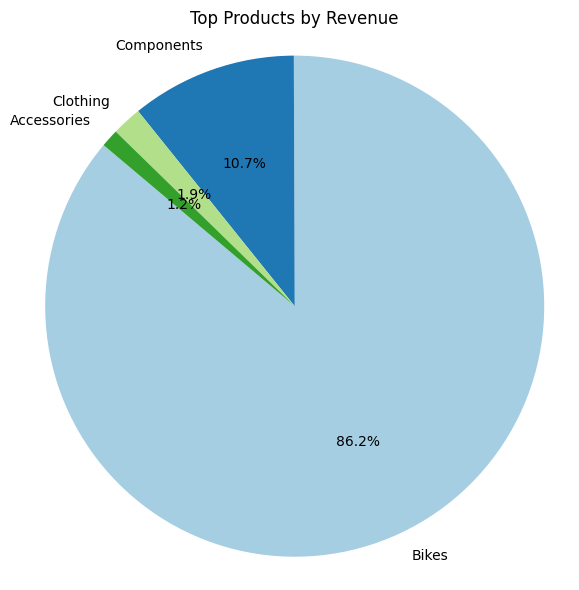

In [58]:
query2 = """SELECT pc.Name, SUM(s.LineTotal) AS Revenue
FROM Sales.SalesOrderDetail s
JOIN Production.Product p ON s.ProductID = p.ProductID
JOIN Production.ProductSubcategory ps ON p.ProductSubcategoryID = ps.ProductSubcategoryID
JOIN Production.ProductCategory pc ON ps.ProductCategoryID = pc.ProductCategoryID
GROUP BY pc.Name
ORDER BY Revenue DESC"""

df = run_query(query2)

plt.figure(figsize=(6, 6))
plt.pie(
    df['Revenue'],
    labels=df['Name'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title('Top Products by Revenue')
plt.axis('equal')  # لجعل الدائرة دائرية تماماً
plt.tight_layout()
plt.show()

C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


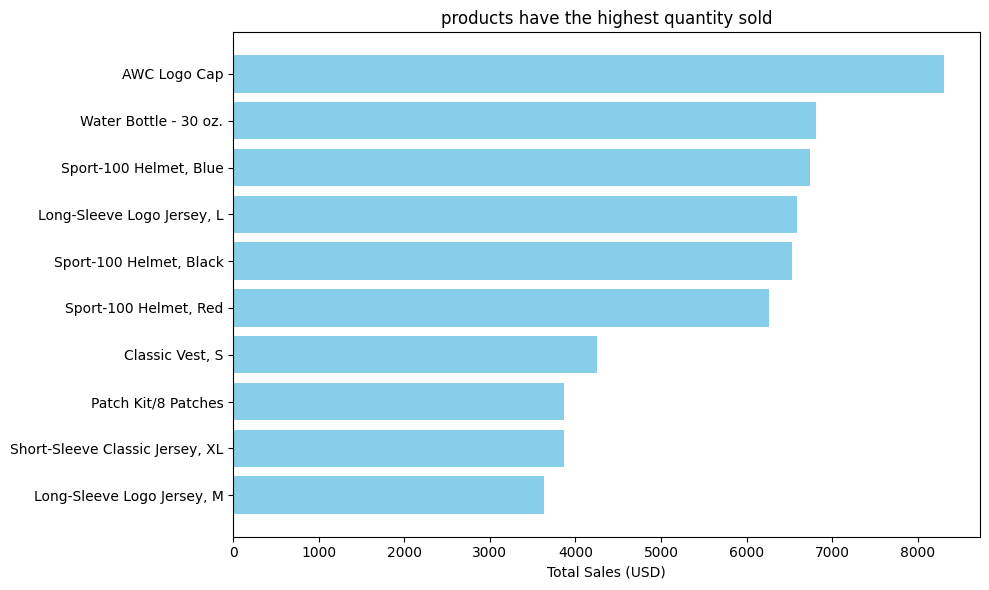

In [64]:
query3 = """SELECT TOP 10 p.Name, SUM(s.OrderQty) AS TotalQuantity
FROM Sales.SalesOrderDetail s
JOIN Production.Product p ON s.ProductID = p.ProductID
GROUP BY p.Name
ORDER BY TotalQuantity DESC;
"""
df = run_query(query3)

plt.figure(figsize=(10, 6))
plt.barh(df['Name'], df['TotalQuantity'], color='skyblue')
plt.xlabel('Total Sales (USD)')
plt.title('products have the highest quantity sold')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


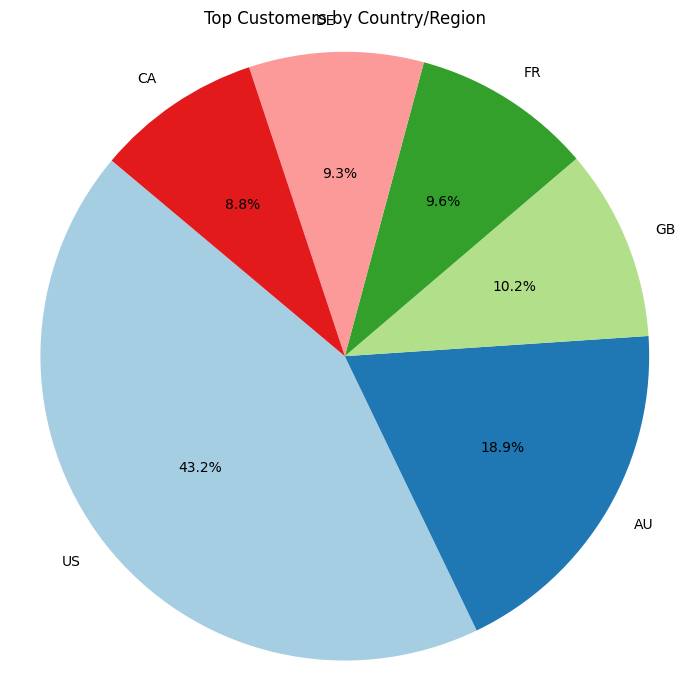

In [ ]:
query4 = """SELECT c.CountryRegionCode, COUNT(*) AS CustomerCount
FROM Sales.Customer cu
JOIN Person.Address a ON cu.CustomerID = a.AddressID
JOIN Person.StateProvince s ON a.StateProvinceID = s.StateProvinceID
JOIN Person.CountryRegion c ON s.CountryRegionCode = c.CountryRegionCode
GROUP BY c.CountryRegionCode
ORDER BY CustomerCount DESC
"""

df = run_query(query4)

plt.figure(figsize=(7, 7))
plt.pie(
    df['CustomerCount'],
    labels=df['CountryRegionCode'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title('Top Customers by Country/Region')
plt.axis('equal')  
plt.tight_layout()
plt.show()

C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


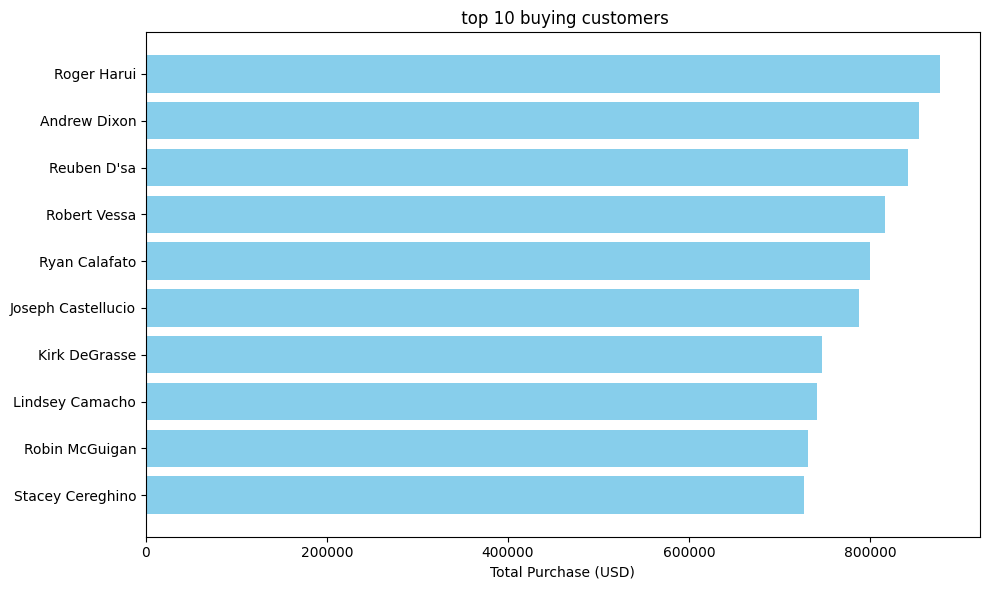

In [71]:
query5 = """SELECT TOP 10 
    p.FirstName + ' ' + p.LastName AS CustomerName,
    SUM(s.LineTotal) AS TotalPurchase
FROM Sales.SalesOrderHeader h
JOIN Sales.SalesOrderDetail s ON h.SalesOrderID = s.SalesOrderID
JOIN Sales.Customer c ON h.CustomerID = c.CustomerID
JOIN Person.Person p ON c.PersonID = p.BusinessEntityID
GROUP BY p.FirstName, p.LastName
ORDER BY TotalPurchase DESC
"""

df = run_query(query5)

plt.figure(figsize=(10, 6))
plt.barh(df['CustomerName'], df['TotalPurchase'], color='skyblue')
plt.xlabel('Total Purchase (USD)')
plt.title(' top 10 buying customers')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


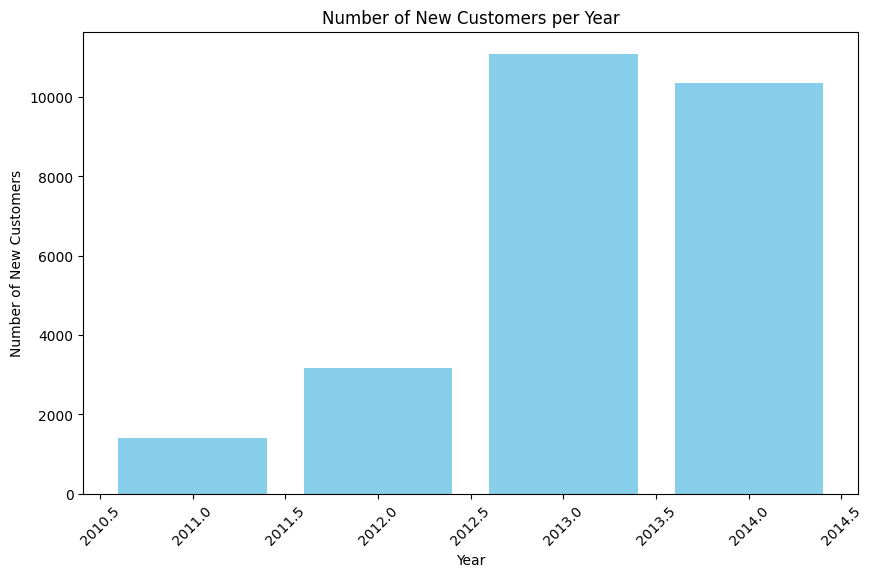

In [75]:
query6 = """SELECT YEAR(h.OrderDate) AS Year, COUNT(DISTINCT h.CustomerID) AS NewCustomers
FROM Sales.SalesOrderHeader h
GROUP BY YEAR(h.OrderDate)
ORDER BY Year"""

df = run_query(query6)

plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['NewCustomers'], color='skyblue')  
plt.xlabel('Year')
plt.ylabel('Number of New Customers')
plt.title('Number of New Customers per Year')
plt.xticks(rotation=45)  
plt.show()

C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


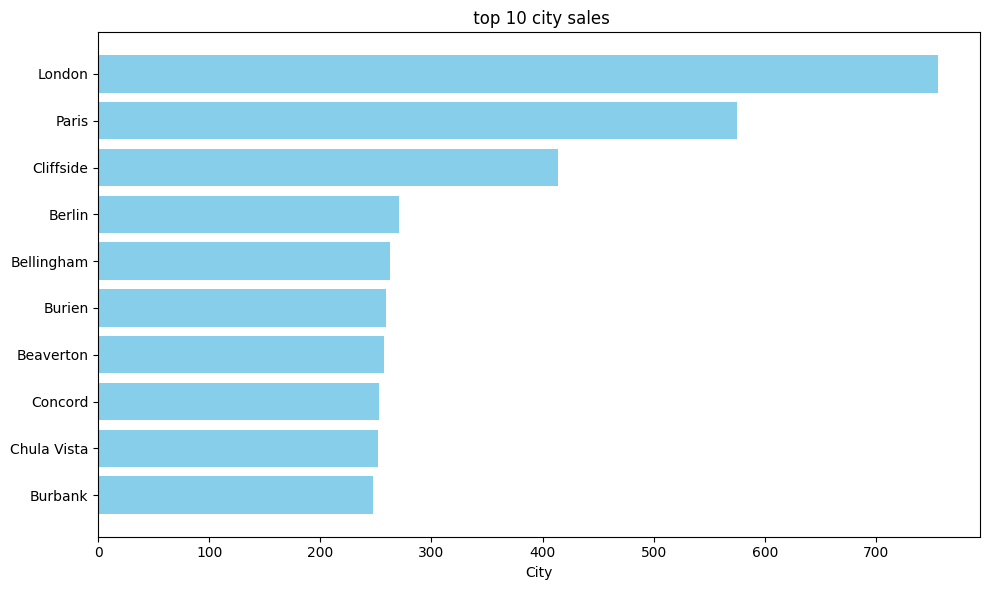

In [76]:
query7 = """SELECT TOP 10  a.City, COUNT(*) AS SalesCount
FROM Sales.SalesOrderHeader h
JOIN Person.Address a ON h.ShipToAddressID = a.AddressID
GROUP BY a.City
ORDER BY SalesCount DESC"""

df = run_query(query7)

plt.figure(figsize=(10, 6))
plt.barh(df['City'], df['SalesCount'], color='skyblue')
plt.xlabel('City')
plt.title(' top 10 city sales')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


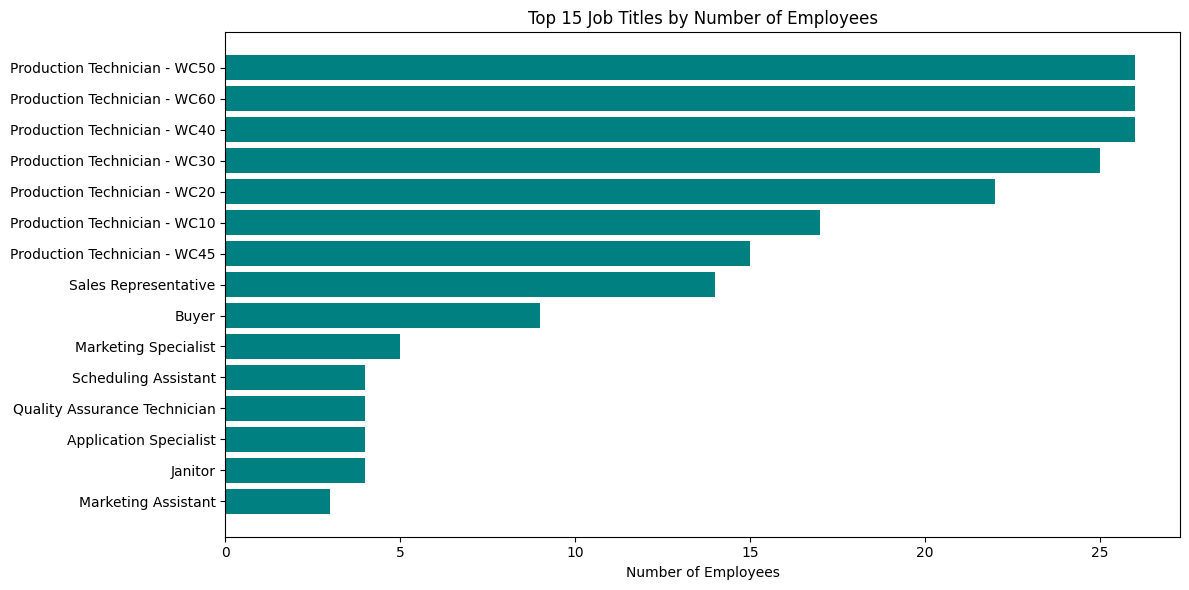

In [ ]:
query8 = """SELECT JobTitle, COUNT(*) AS NumberOfEmployees
FROM HumanResources.Employee
GROUP BY JobTitle
ORDER BY NumberOfEmployees DESC"""
# تشغيل الاستعلام
df = run_query(query8)


top_jobs = df.head(15)


plt.figure(figsize=(12, 6))
plt.barh(top_jobs['JobTitle'], top_jobs['NumberOfEmployees'], color='teal')
plt.xlabel('Number of Employees')
plt.title('Top 15 Job Titles by Number of Employees')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


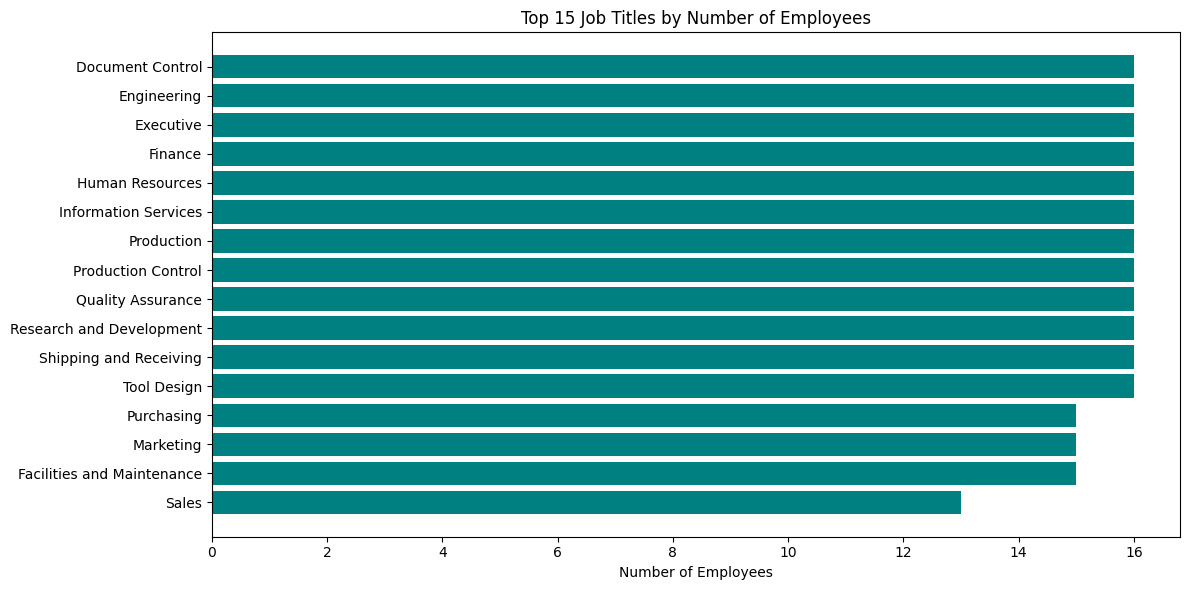

In [78]:
query = """SELECT d.Name AS Department,
       AVG(DATEDIFF(YEAR, e.HireDate, GETDATE())) AS AvgYearsWorked
FROM HumanResources.Employee e
JOIN HumanResources.EmployeeDepartmentHistory edh ON e.BusinessEntityID = edh.BusinessEntityID
JOIN HumanResources.Department d ON edh.DepartmentID = d.DepartmentID
WHERE edh.EndDate IS NULL 
GROUP BY d.Name
ORDER BY AvgYearsWorked DESC"""

df = run_query(query)

plt.figure(figsize=(12, 6))
plt.barh(df['Department'], df['AvgYearsWorked'], color='teal')
plt.xlabel('Number of Employees')
plt.title('Top 15 Job Titles by Number of Employees')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


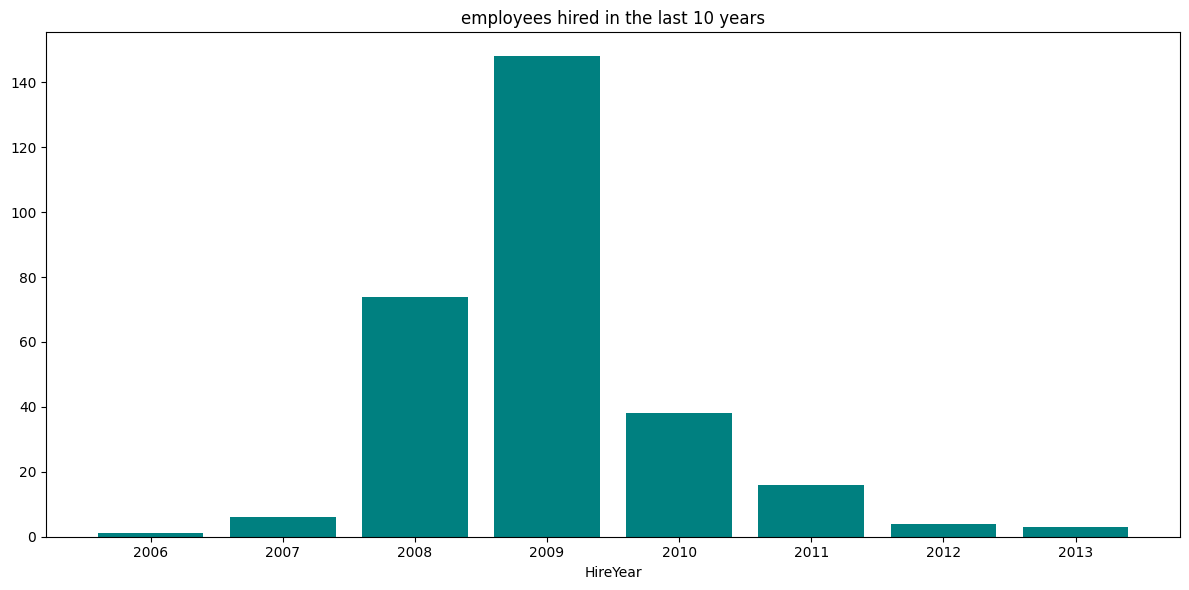

In [83]:
query9 = """SELECT YEAR(HireDate) AS HireYear, COUNT(*) AS NumberOfHiredEmployees
FROM HumanResources.Employee
WHERE HireDate >= DATEADD(YEAR, -20, GETDATE())
GROUP BY YEAR(HireDate)
ORDER BY HireYear
"""

df = run_query(query9)

plt.figure(figsize=(12, 6))
plt.bar(df['HireYear'], df['NumberOfHiredEmployees'], color='teal')
plt.xlabel('HireYear')
plt.title('employees hired in the last 10 years')
plt.tight_layout()
plt.show()


C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\485773046.py:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\A-R\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


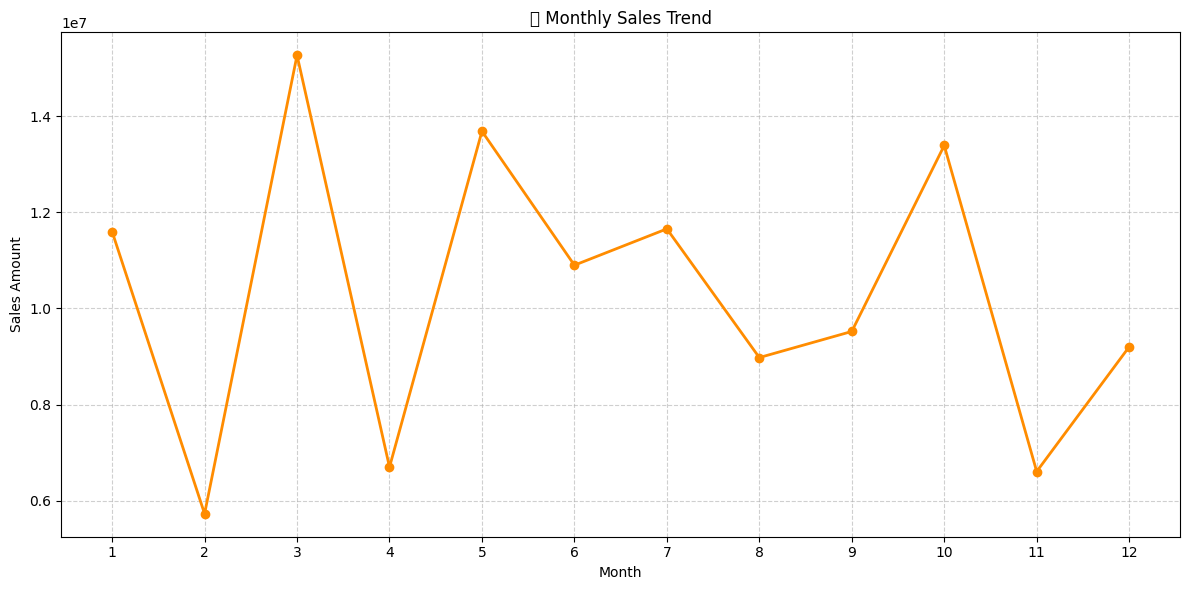

In [89]:
query10 = """SELECT MONTH(OrderDate) AS Month, SUM(TotalDue) AS MonthlySales
FROM Sales.SalesOrderHeader
GROUP BY MONTH(OrderDate)
ORDER BY Month
"""

df = run_query(query10)

plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['MonthlySales'], marker='o', color='darkorange', linewidth=2)

plt.title('📈 Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(df['Month'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [48]:
query11 = """SELECT YEAR(OrderDate) AS Year, SUM(TotalDue) AS TotalSales
FROM Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate)
ORDER BY Year
"""

run_query(query11)

C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Year,TotalSales
0,2011,1.415570e+07
1,2012,3.767570e+07
2,2013,4.896589e+07
3,2014,2.241950e+07


C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3455524615.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\A-R\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


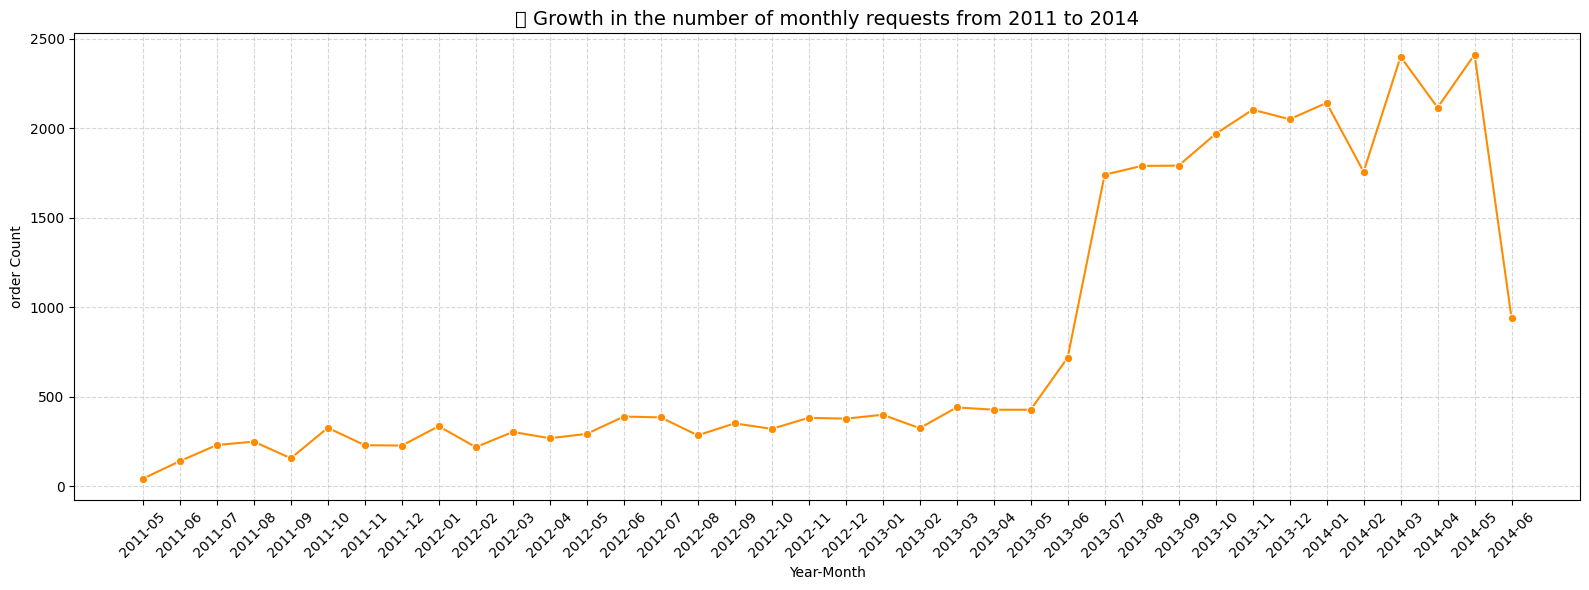

In [88]:
query12 = """SELECT 
    YEAR(OrderDate) AS OrderYear,
    MONTH(OrderDate) AS OrderMonth,
    COUNT(SalesOrderID) AS TotalOrders
FROM Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate), MONTH(OrderDate)
ORDER BY OrderYear, OrderMonth"""

df = run_query(query12)

df['YearMonth'] = df['OrderYear'].astype(str) + '-' + df['OrderMonth'].astype(str).str.zfill(2)

plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='YearMonth', y='TotalOrders', marker='o', color='darkorange')

plt.title('📊 Growth in the number of monthly requests from 2011 to 2014', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('order Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [50]:
query13 = """SELECT 
    YEAR(OrderDate) AS Year,
    MONTH(OrderDate) AS Month,
    AVG(TotalDue) AS AvgInvoiceAmount
FROM Sales.SalesOrderHeader
GROUP BY YEAR(OrderDate), MONTH(OrderDate)
ORDER BY Year, Month"""

run_query(query13)

C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Year,Month,AvgInvoiceAmount
0,2011,5,13186.5337
1,2011,6,3596.4288
2,2011,7,9922.8696
3,2011,8,11202.3046
4,2011,9,3533.7045
5,2011,10,15768.4083
6,2011,11,3544.8391
7,2011,12,6414.2495
8,2012,1,13268.8614
9,2012,2,7529.9173


In [51]:
query14 = """SELECT 
    CASE 
        WHEN MONTH(OrderDate) IN (12, 1, 2) THEN 'Winter'
        WHEN MONTH(OrderDate) IN (3, 4, 5) THEN 'Spring'
        WHEN MONTH(OrderDate) IN (6, 7, 8) THEN 'Summer'
        WHEN MONTH(OrderDate) IN (9, 10, 11) THEN 'Fall'
    END AS Season,
    SUM(TotalDue) AS TotalSales
FROM Sales.SalesOrderHeader
GROUP BY 
    CASE 
        WHEN MONTH(OrderDate) IN (12, 1, 2) THEN 'Winter'
        WHEN MONTH(OrderDate) IN (3, 4, 5) THEN 'Spring'
        WHEN MONTH(OrderDate) IN (6, 7, 8) THEN 'Summer'
        WHEN MONTH(OrderDate) IN (9, 10, 11) THEN 'Fall'
    END
ORDER BY TotalSales DESC"""

run_query(query14)

C:\Users\A-R\AppData\Local\Temp\ipykernel_19188\3496269690.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Season,TotalSales
0,Spring,3.564772e+07
1,Summer,3.152942e+07
2,Fall,2.951586e+07
3,Winter,2.652379e+07
